# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [1]:
!pip install numpy
!pip install pandas

Import the core data science libraries:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [4]:
# place your code into this Code cell
df = pd.read_csv('data/data.csv')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

In [5]:
# Show 5 rows, selected at random, from the data set.
df.sample(5)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
44676,284234595,03/23/2024,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110MU,M,Q,113,0,25-44,M,BLACK,1043932,184871,40.673904,-73.784844,POINT (-73.78484373470152 40.67390372239954)
15256,280000184,01/04/2024,905.0,"INTOXICATED DRIVING,ALCOHOL",347.0,INTOXICATED & IMPAIRED DRIVING,VTL1192000,M,Q,109,0,25-44,M,WHITE HISPANIC,1028736,225533,40.785600,-73.839357,POINT (-73.83935702185012 40.78560016886259)
43842,281414939,01/31/2024,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,K,73,0,45-64,M,BLACK,1010782,185568,40.675980,-73.904348,POINT (-73.904348 40.67598)
5496,281164499,01/26/2024,748.0,"CONTEMPT,CRIMINAL",359.0,OFFENSES AGAINST PUBLIC ADMINI,PL 2155003,M,M,25,0,25-44,M,BLACK,1000581,231070,40.800896,-73.941011,POINT (-73.941011 40.800896)
9189,280145895,01/08/2024,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,1,0,45-64,M,WHITE HISPANIC,980603,195695,40.703815,-74.013151,POINT (-74.013151 40.703815)


In [6]:
# Show each of the column names and their data types.
df.dtypes

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                       float64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
dtype: object

In [7]:
# Show any unique features of your chosen data set.
df.nunique()

ARREST_KEY                  63621
ARREST_DATE                    91
PD_CD                         231
PD_DESC                       221
KY_CD                          66
OFNS_DESC                      62
LAW_CODE                      770
LAW_CAT_CD                      6
ARREST_BORO                     5
ARREST_PRECINCT                77
JURISDICTION_CODE              25
AGE_GROUP                       5
PERP_SEX                        2
PERP_RACE                       7
X_COORD_CD                  15785
Y_COORD_CD                  16393
Latitude                    17663
Longitude                   17629
New Georeferenced Column    17879
dtype: int64

In [8]:
# Check for missing values in each column
df.isnull().sum()

ARREST_KEY                    0
ARREST_DATE                   0
PD_CD                         2
PD_DESC                       0
KY_CD                         9
OFNS_DESC                     0
LAW_CODE                      0
LAW_CAT_CD                  402
ARREST_BORO                   0
ARREST_PRECINCT               0
JURISDICTION_CODE             0
AGE_GROUP                     0
PERP_SEX                      0
PERP_RACE                     0
X_COORD_CD                    0
Y_COORD_CD                    0
Latitude                      0
Longitude                     0
New Georeferenced Column      0
dtype: int64

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

### 1. Suppose we only care about the missing values in 'Column1' and 'Column2'.

In [11]:
df = df.dropna(subset=['PD_CD', 'KY_CD', 'LAW_CAT_CD'])
df.head(5)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,280255493,01/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,26,0,<18,M,BLACK,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845)
1,279805419,01/02/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
2,279895750,01/03/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,0,65+,F,WHITE,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526)
3,280809090,01/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
4,280357135,01/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456)


### 2. Change the AGE_GROUP column from the previous '<18', '18-24', '25-44', '45-64', '65+' Convert to 0, 1, 2, 3, 4 labels

In [12]:
age_group_mapping = {
    '<18': 0,
    '18-24': 1,
    '25-44': 2,
    '45-64': 3,
    '65+': 4
}

df['AGE_GROUP_ENCODED'] = df['AGE_GROUP'].map(age_group_mapping)
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,AGE_GROUP_ENCODED
0,280255493,01/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,26,0,<18,M,BLACK,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845),0
1,279805419,01/02/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259),2
2,279895750,01/03/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,0,65+,F,WHITE,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526),4
3,280809090,01/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793),3
4,280357135,01/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456),2


### 3. Filter LAW_CAT_CD columns to keep only rows with values 'V', 'M', 'F'.

In [24]:
values_to_keep = ['V', 'M', 'F']

df = df[df['LAW_CAT_CD'].isin(values_to_keep)]
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,AGE_GROUP_ENCODED
0,280255493,01/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,26,0,<18,M,BLACK,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845),0
1,279805419,01/02/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259),2
2,279895750,01/03/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,0,65+,F,WHITE,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526),4
3,280809090,01/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793),3
4,280357135,01/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456),2


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

### 1. Groups based on AGE_GROUP_ENCODED and finds the total number of LAW_CAT_CDs in each group and then sorts them by number.

In [25]:
law_cat_counts = df.groupby('AGE_GROUP_ENCODED')['LAW_CAT_CD'].value_counts().sort_values(ascending=False)
law_cat_counts

AGE_GROUP_ENCODED  LAW_CAT_CD
2                  M             21257
                   F             15039
3                  M              7438
1                  M              5669
                   F              4840
3                  F              4640
0                  F              1742
4                  M               630
0                  M               582
2                  V               551
4                  F               389
3                  V               128
1                  V                86
4                  V                10
Name: LAW_CAT_CD, dtype: int64

### 2. Find the arresting district with the most offenders and show the specific name of the arresting district.

In [26]:
boro_counts = df['ARREST_BORO'].value_counts()

most_common_boro = boro_counts.idxmax()
most_common_boro_count = boro_counts.max()

boro_mapping = {
'B':'Bronx', 
'S':'Staten Island', 
'K':'Brooklyn', 
'M':'Manhattan', 
'Q':'Queens'
}

most_common_boro_mapped = boro_mapping[most_common_boro]
print(most_common_boro_mapped,':', most_common_boro_count)

Brooklyn : 17306


### 3. Grouped according to age and counted the gender with the highest number of offenses within each group.

In [27]:
sex_counts = df.groupby('AGE_GROUP_ENCODED')['PERP_SEX'].value_counts().unstack()

sex_counts_max = sex_counts.max(axis=1)

sex_counts_max_gender = sex_counts.idxmax(axis=1)

result_df = pd.DataFrame({
    'Max Gender': sex_counts_max_gender,
    'Max Count': sex_counts_max
})

print(result_df)

                  Max Gender  Max Count
AGE_GROUP_ENCODED                      
0                          M       1917
1                          M       8612
2                          M      30203
3                          M      10287
4                          M        880


### 4. Group by gender and race and calculate the average of the number of races.

In [28]:
group_sizes = df.groupby(['PERP_SEX', 'PERP_RACE']).size()

race_count_average = group_sizes.groupby(level=0).mean()

race_count_average_rounded = race_count_average.round(0).astype(int)

print(race_count_average_rounded)

PERP_SEX
F    1586
M    7414
dtype: int64


### 5. Proportion of crimes with a misdemeanor level when the arrest area is Manhattan.

In [29]:
group_counts = df.groupby(['ARREST_BORO', 'LAW_CAT_CD']).size()

manhattan_counts = group_counts['M']

misdemeanor_ratio = manhattan_counts.get('M', 0) / manhattan_counts.sum()

print(f"In the data where 'ARREST_BORO' is 'M', the proportion of 'LAW_CAT_CD' that is 'M' is: {misdemeanor_ratio:.2%}")

In the data where 'ARREST_BORO' is 'M', the proportion of 'LAW_CAT_CD' that is 'M' is: 56.36%


## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

### 1. Draw bar charts based on the column LAW_CAT_CD

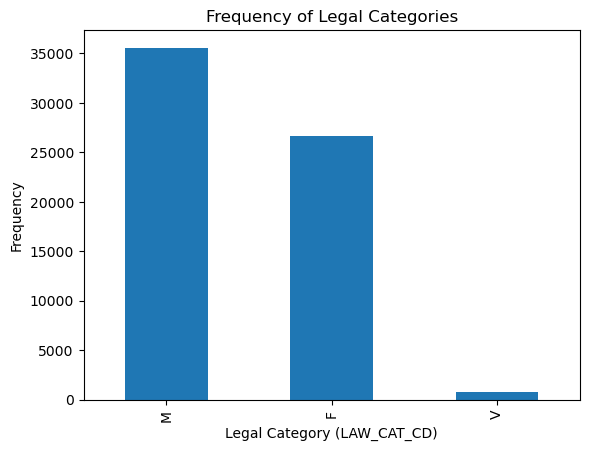

In [30]:
law_cat_counts = df['LAW_CAT_CD'].value_counts()

law_cat_counts.plot(kind='bar')

plt.title('Frequency of Legal Categories')
plt.xlabel('Legal Category (LAW_CAT_CD)')
plt.ylabel('Frequency')

plt.show()

### 2. Draw pie charts using the column PERP_RACE

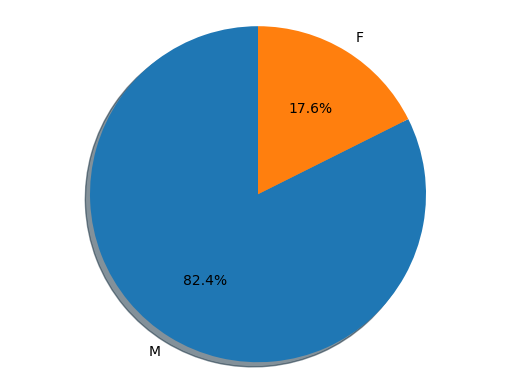

In [33]:
race_counts = df['PERP_SEX'].value_counts()

race_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)

plt.axis('equal')

plt.ylabel('')  

plt.show()

### 3. Draw line charts according to the column AGE_GROUP_ENCODED

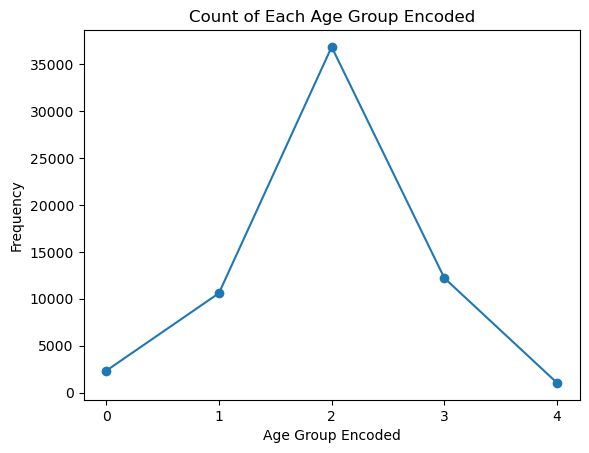

In [39]:
age_group_counts = df['AGE_GROUP_ENCODED'].value_counts().sort_index()

age_group_counts.plot(kind='line', marker='o')

plt.title('Count of Each Age Group Encoded')
plt.xlabel('Age Group Encoded')
plt.ylabel('Frequency')

plt.xticks(range(int(age_group_counts.index.min()), int(age_group_counts.index.max()) + 1))

plt.show()

### 4. Based on the racial groupings, calculate the number of genders in each race and draw bar charts.

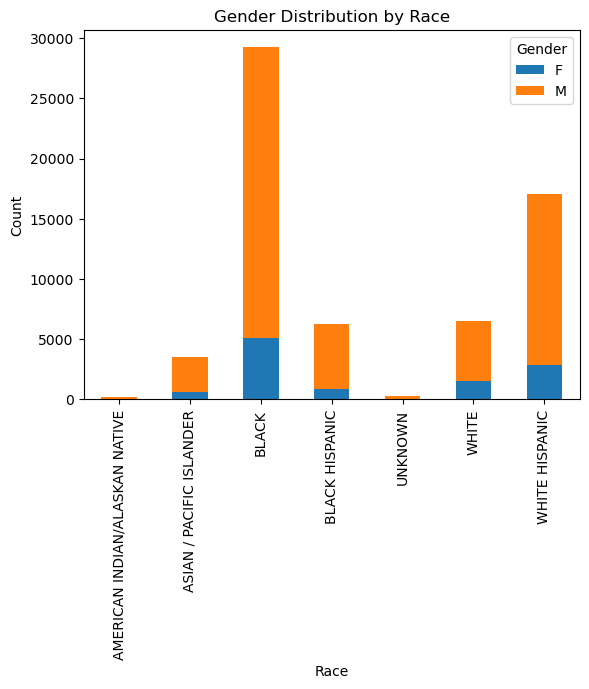

In [40]:
sex_by_race = df.groupby(['PERP_RACE', 'PERP_SEX']).size().unstack(fill_value=0)

sex_by_race.plot(kind='bar', stacked=True) 

plt.title('Gender Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')

plt.legend(title='Gender')

plt.show()

### 5. Plot bar charts by grouping by arrest area and calculating the total age distribution within the different areas.### 5. 

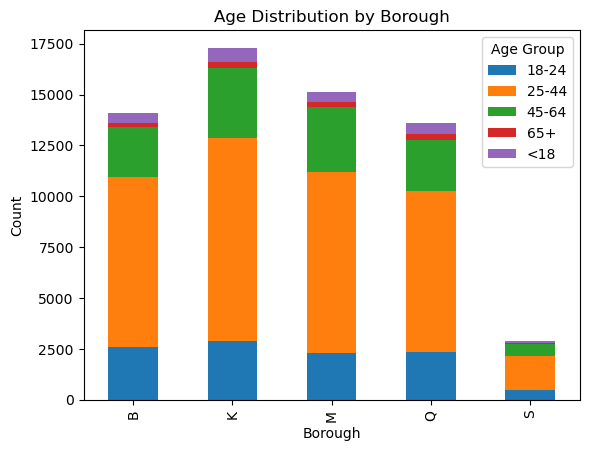

In [42]:
age_distribution_by_boro = df.groupby(['ARREST_BORO', 'AGE_GROUP']).size().unstack(fill_value=0)

age_distribution_by_boro.plot(kind='bar', stacked=True) 

plt.title('Age Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')

plt.legend(title='Age Group')

plt.show()